<a href="https://colab.research.google.com/github/keshab97/100DaysOfMLcode/blob/master/bee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data


In [2]:
from google.colab import drive
drive.mount("drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [3]:
!ls

drive  sample_data


In [4]:
%cd drive

/content/drive


In [5]:
%cd My Drive

/content/drive/My Drive


In [6]:
!ls

 a0409a00-8-dataset_dp.zip   honey-bee-annotated-images.zip   test.csv
 bee_data.csv		     PER			      test_img
 bee_imgs		     prof.jpg			      train.csv
'Colab Notebooks'	     sample_submission.csv	      train_img


In [0]:
%cd drive/My Drive

/content/drive/My Drive


In [7]:
!ls

 a0409a00-8-dataset_dp.zip   honey-bee-annotated-images.zip   test.csv
 bee_data.csv		     PER			      test_img
 bee_imgs		     prof.jpg			      train.csv
'Colab Notebooks'	     sample_submission.csv	      train_img


In [8]:
%cd ../../

/content


In [0]:
import pandas as pd
dataset=pd.read_csv("drive/My Drive/bee_data.csv")

In [5]:
dataset.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [6]:
dataset.describe()

,zip code
count,5172.000000
mean,68599.910480
std,27101.954146
min,3431.000000
25%,50315.000000
50%,77511.000000
75%,95070.000000
max,95124.000000


In [7]:
dataset.shape

(5172, 9)

In [8]:
total = dataset.isnull().sum().sort_values()
print(total)
percent = (dataset.isnull().sum()/dataset.count()*100).sort_values(ascending = False)
print(percent)
pd.concat([percent], axis=1, keys=['Percent'])

file               0
date               0
time               0
location           0
zip code           0
subspecies         0
health             0
pollen_carrying    0
caste              0
dtype: int64
caste              0.0
pollen_carrying    0.0
health             0.0
subspecies         0.0
zip code           0.0
location           0.0
time               0.0
date               0.0
file               0.0
dtype: float64


,Percent
caste,0.0
pollen_carrying,0.0
health,0.0
subspecies,0.0
zip code,0.0
location,0.0
time,0.0
date,0.0
file,0.0


In [9]:
dataset.count()

file               5172
date               5172
time               5172
location           5172
zip code           5172
subspecies         5172
health             5172
pollen_carrying    5172
caste              5172
dtype: int64

In [0]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
from sklearn.model_selection import train_test_split
import skimage
import skimage.io
import skimage.transform
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D
from keras.layers import Flatten

In [11]:
#images path
image_path="drive/My Drive/bee_imgs/"
image_files = list(os.listdir(image_path))
print(image_files)
print(len(image_files))

['010_441.png', '040_258.png', '041_015.png', '010_731.png', '038_373.png', '032_576.png', '004_412.png', '015_599.png', '036_100.png', '032_349.png', '015_1041.png', '021_149.png', '010_610.png', '015_1251.png', '010_385.png', '017_131.png', '004_444.png', '040_165.png', '015_488.png', '043_045.png', '015_662.png', '033_102.png', '015_971.png', '001_082.png', '013_028.png', '008_223.png', '022_262.png', '010_082.png', '010_841.png', '011_025.png', '038_066.png', '015_810.png', '015_1004.png', '032_062.png', '017_055.png', '039_017.png', '015_897.png', '019_858.png', '040_396.png', '038_412.png', '032_258.png', '034_046.png', '001_094.png', '005_317.png', '040_060.png', '008_133.png', '041_002.png', '030_855.png', '046_019.png', '032_499.png', '016_255.png', '015_313.png', '015_794.png', '032_833.png', '018_032.png', '038_061.png', '002_104.png', '010_818.png', '041_037.png', '015_1227.png', '012_011.png', '004_102.png', '031_081.png', '010_808.png', '004_315.png', '022_128.png', '015_

In [12]:
dataset_files = list(dataset['file'])
print(dataset_files)
print(len(dataset_files))

['041_066.png', '041_072.png', '041_073.png', '041_067.png', '041_059.png', '041_071.png', '041_065.png', '041_064.png', '041_070.png', '041_058.png', '041_074.png', '041_060.png', '041_048.png', '041_049.png', '041_061.png', '041_075.png', '041_063.png', '041_076.png', '041_062.png', '041_039.png', '041_005.png', '041_011.png', '041_010.png', '041_004.png', '041_038.png', '041_012.png', '041_006.png', '041_007.png', '041_017.png', '041_003.png', '041_002.png', '041_016.png', '041_000.png', '041_014.png', '041_028.png', '041_029.png', '041_015.png', '041_001.png', '041_018.png', '041_024.png', '041_030.png', '041_031.png', '041_025.png', '041_019.png', '041_033.png', '041_027.png', '041_026.png', '041_032.png', '041_036.png', '041_022.png', '041_023.png', '041_037.png', '041_021.png', '041_035.png', '041_008.png', '041_034.png', '041_020.png', '041_047.png', '041_053.png', '041_052.png', '041_046.png', '041_050.png', '041_044.png', '041_045.png', '041_051.png', '041_055.png', '041_041.

In [0]:
def imagesizes(image_file):
    image = cv2.imread(image_path+image_file)
    return list(image.shape)

In [15]:
imagesizes(dataset['file'][0])

[115, 164, 3]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


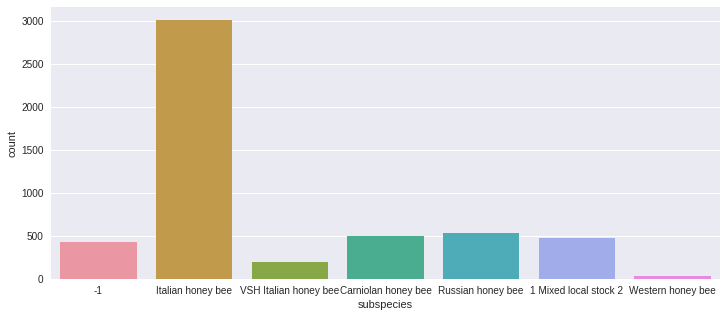

In [16]:
mlt.figure(figsize=(12,5))
sns.countplot(dataset['subspecies'],data=dataset)
mlt.xlabel("subspecies")
mlt.ylabel("count")
mlt.show()

In [0]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=10)

In [0]:
train_set, val_set = train_test_split(train_set, test_size=0.2, random_state=5)

In [115]:
print("Train data: {}".format(train_set.shape[0]))
print("Test data : {}".format(test_set.shape[0]))
print("Val data: {}".format(val_set.shape[0]))

Train data: 3309
Test data : 1035
Val data: 828


In [0]:
def im_reading(image_file):
    image = cv2.imread(image_path+ image_file)
    image = skimage.transform.resize(image, (100, 100), mode='reflect')
    print(image.shape)
    return image[:,:,:3]

In [0]:
#categorical variable to dummy variable
def dummy(dataset):
    X = np.stack(dataset['file'].apply(im_reading))
    Y = pd.get_dummies(dataset['subspecies'], drop_first=False)
    print(X)
    print(Y)
    return X, Y

In [33]:
X_train, y_train = dummy(train_set)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [0]:
X_val, y_val = dummy(val_set)

In [0]:
X_test, y_test = dummy(test_set)

In [0]:
image_generator = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True,
        vertical_flip=True)
image_generator.fit(X_train)

In [0]:
def mode_creation():
  model_=Sequential()
  model_.add(Conv2D(16, kernel_size=3, input_shape=(100, 100,3), activation='relu', padding='same'))
  model_.add(MaxPool2D(2))
  model_.add(Conv2D(32, kernel_size=3,activation='relu', padding='same'))
  model_.add(MaxPool2D(2))
  model_.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
  model_.add(Flatten())
  model_.add(Dense(y_train.columns.size, activation='softmax'))
  model_.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model_

In [86]:
model=mode_creation()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 25, 25, 16)        4624      
_________________________________________________________________
flatten_9 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 70007     
Total para

In [87]:
gen=image_generator.flow(X_train, y_train, batch_size=32)
model1  = model.fit_generator(gen,epochs=5,validation_data=[X_val, y_val],steps_per_epoch=len(X_train)/5,shuffle=True)

Epoch 1/5
662/661 [==============================] - 59s 89ms/step - loss: 0.4987 - acc: 0.8078 - val_loss: 0.2296 - val_acc: 0.9106
Epoch 2/5
662/661 [==============================] - 59s 89ms/step - loss: 0.2777 - acc: 0.8839 - val_loss: 0.2158 - val_acc: 0.9070
Epoch 3/5
662/661 [==============================] - 60s 90ms/step - loss: 0.2305 - acc: 0.9028 - val_loss: 0.2100 - val_acc: 0.9227
Epoch 4/5
662/661 [==============================] - 60s 91ms/step - loss: 0.1989 - acc: 0.9144 - val_loss: 0.1856 - val_acc: 0.9130
Epoch 5/5
662/661 [==============================] - 60s 91ms/step - loss: 0.2350 - acc: 0.8971 - val_loss: 0.2106 - val_acc: 0.9155


In [88]:
accuracy=model.evaluate(X_test,y_test)[1]
print("accuracy :{}%" .format(accuracy*100))

1035/1035 [==============================] - 0s 349us/step
accuracy :90.62801935246601%


In [110]:
y_test.columns

Index(['-1', '1 Mixed local stock 2', 'Carniolan honey bee',
       'Italian honey bee', 'Russian honey bee', 'VSH Italian honey bee',
       'Western honey bee'],
      dtype='object')

In [0]:
predict=model.predict(X_test)

In [114]:
np.argmax(predict,axis=1)

array([3, 4, 5, ..., 3, 3, 3])